In [107]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [108]:
raw_data = os.path.join('..', 'src', 'analytics', 'freq_series.csv')
df = pd.read_csv(raw_data)
display(df)

,date,frequencia,price
0,2016-01-04,1735,122.085879
1,2016-01-05,1867,120.681307
2,2016-01-06,1826,120.928258
3,2016-01-07,1776,120.958896
4,2016-01-08,1782,127.640853
...,...,...,...
360,2016-12-29,2835,138.045503
361,2016-12-30,2840,144.738380
362,2016-12-31,2859,145.698146
363,2017-01-01,2922,138.126968


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        365 non-null    object 
 1   frequencia  365 non-null    int64  
 2   price       365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [110]:
# transformando data em pd.datetime
df['date'] = pd.to_datetime(df['date'])

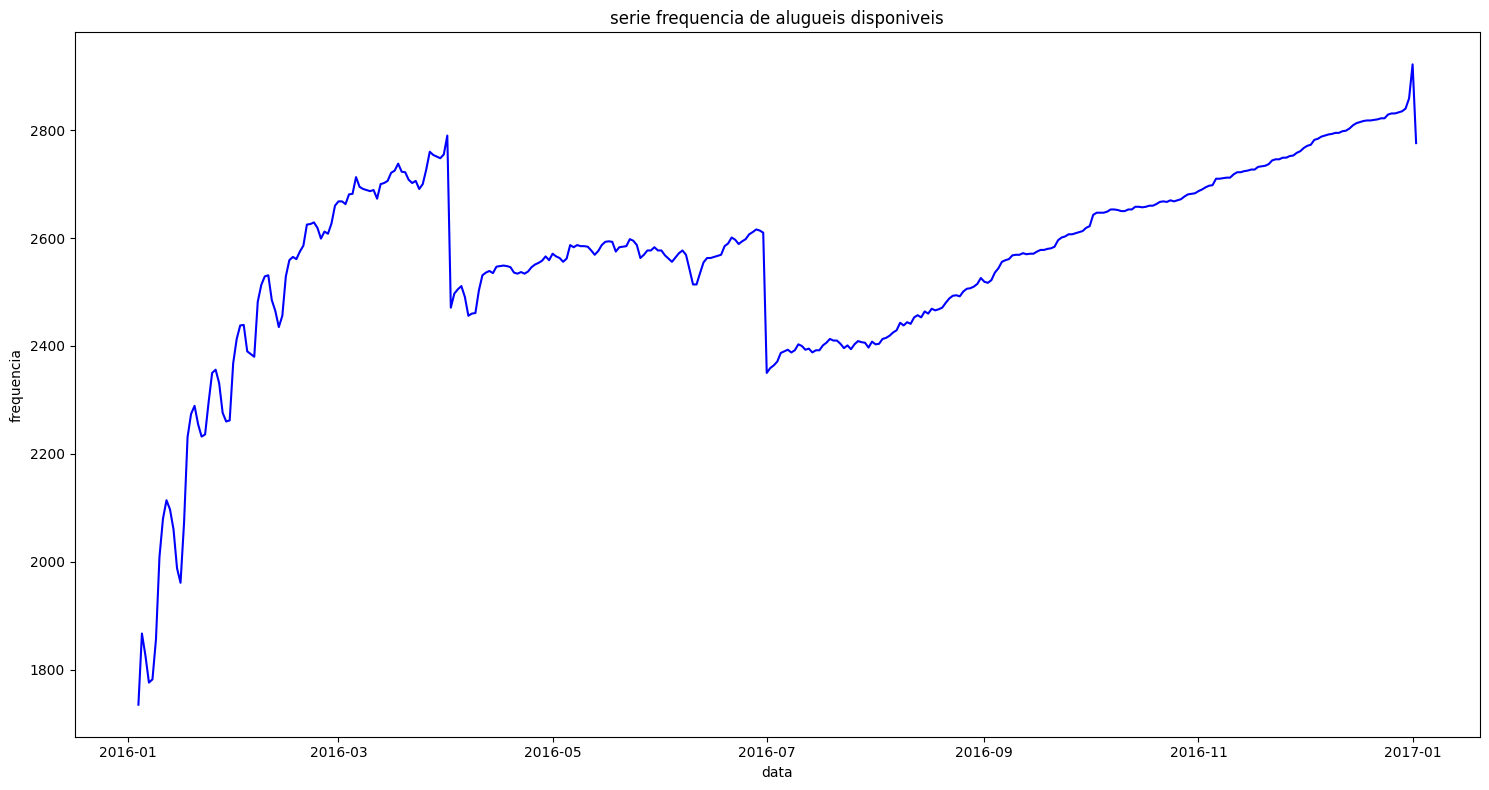

In [111]:
# plotando serie frequencia 
plt.figure(figsize=(15,8))
plt.title('serie frequencia de alugueis disponiveis')
sns.lineplot(data=df, x='date', y='frequencia', color='blue')
plt.xlabel('data')
plt.ylabel('frequencia')
plt.tight_layout()
plt.show()

In [112]:
# criando funcao para decomposiçao da serie 
def serie_decomp(serie:pd.Series, window: float): 
    sazo = serie.diff() # sazonalidade 
    trend = serie.rolling(window).sum() # tendencia 
    move_avg = serie.rolling(window).mean() # media movel 
    
    # plotando graficos 
    
    #grafico sazonalidade 
    plt.figure(figsize=(15,8))
    plt.title('sazonalidade')
    sns.lineplot(sazo, color='orange')  
    plt.tight_layout()
    plt.show()
    
    # grafico tendencia
    plt.figure(figsize=(15,8))
    plt.title(f'tendencia| Janela de {window} dias')
    sns.lineplot(trend, color='red',marker='o')  
    plt.grid()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15,8))
    plt.title(f'media movel | Janela de {window} dias')
    sns.lineplot(move_avg, color='blue', marker='o')
    plt.grid() 
    plt.tight_layout()
    plt.show()

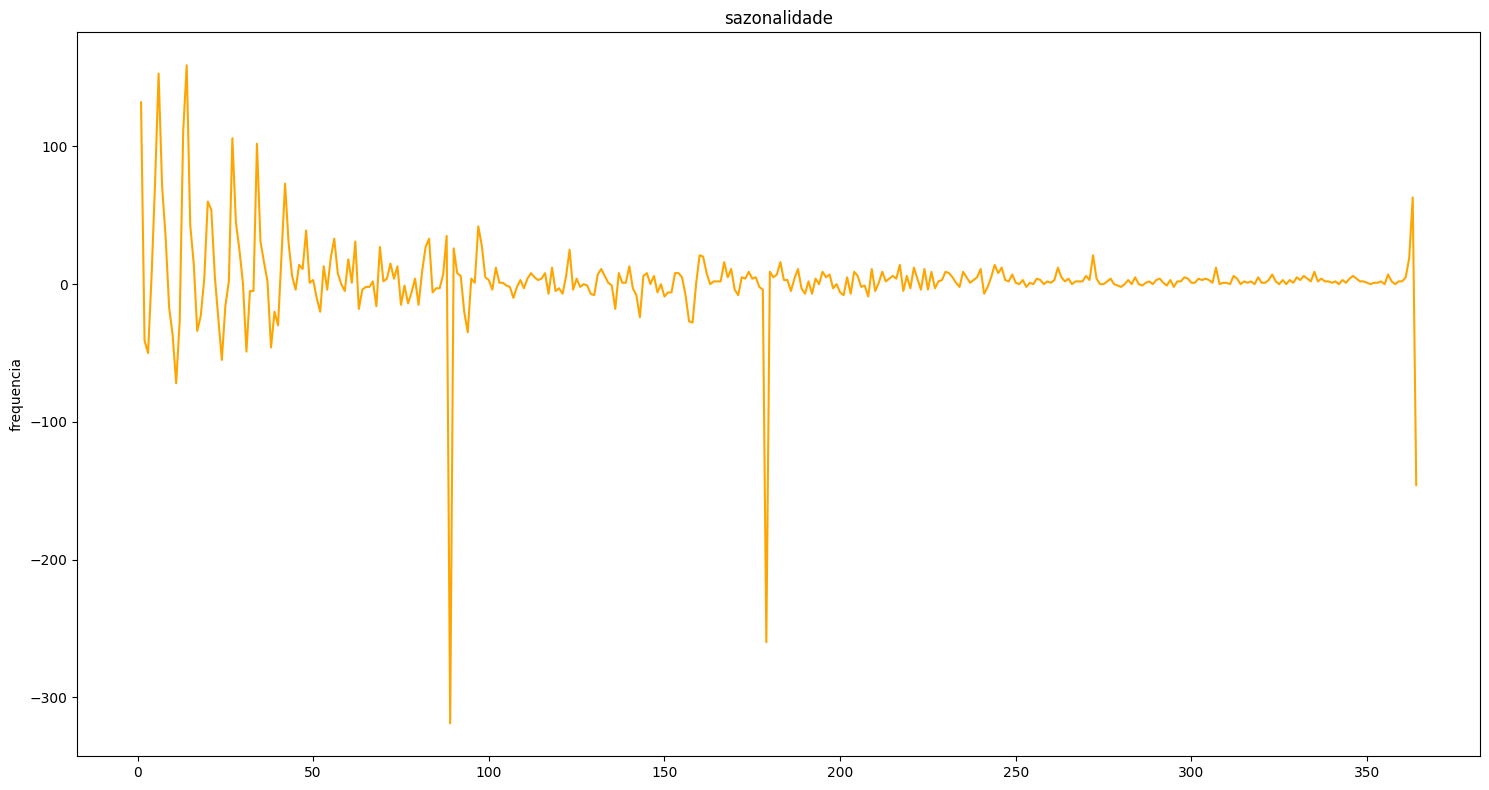

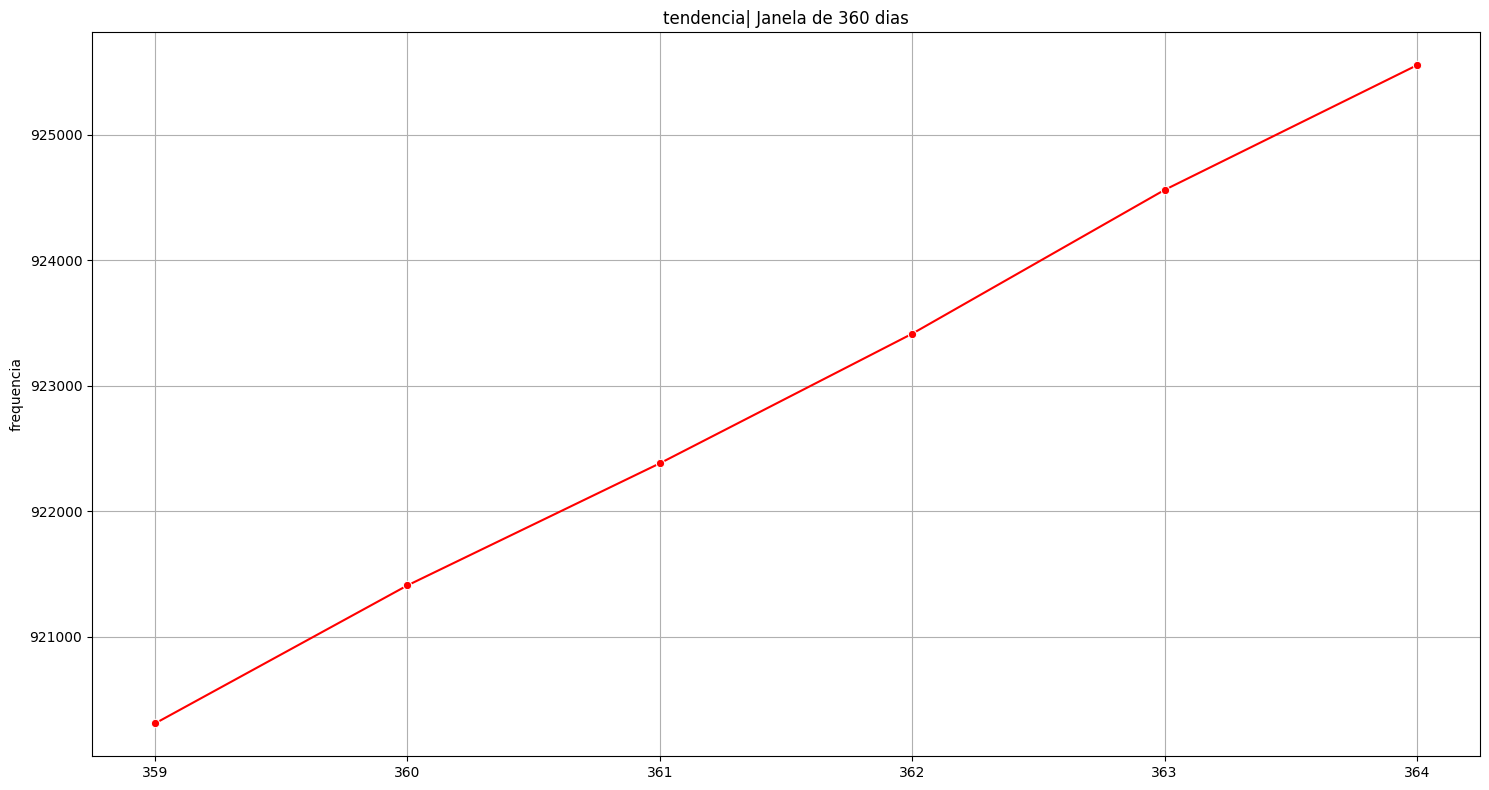

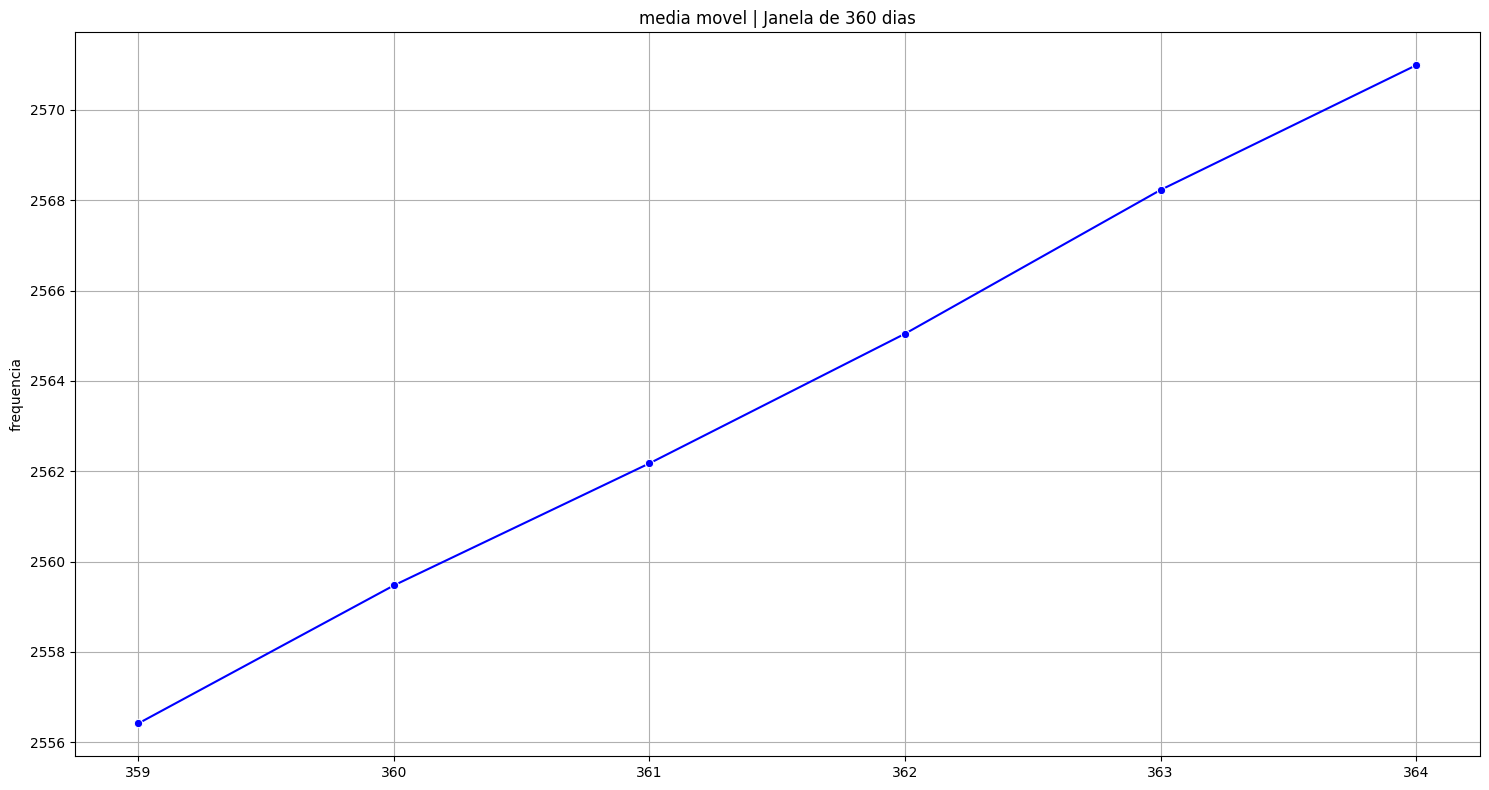

In [113]:
# utilizando funcao
serie_decomp(serie=df['frequencia'], window=360)

In [114]:
# aplicando transformada de fourier para analises de picos 
def fourier(serie:pd.Series, fs, limiar_frac=0.01):
    serie = np.ravel(serie)
    N = len(serie)
    x = np.arange(N)/fs
    
    #fft
    y = np.fft.fft(serie)
    freq = np.fft.fftfreq(N, d=1/fs)
    inv_y = np.fft.ifft(y) # inversa 
    
    # plots
    plt.figure(figsize=(10,4))
    plt.plot(x, serie)
    plt.title('Sinal original')
    plt.xlabel('Tempo')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.plot(freq[:N//2], np.abs(y[:N//2]))
    plt.title('FFT do sinal')
    plt.xlabel('Frequência [tempo]')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.plot(x, inv_y.real, color='red')
    plt.title('FFT inversa (reconstruçao do sinal)')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    # grafico picos mais significativos 
    magnitude = np.abs(y[:N//2])
    limiar = limiar_frac * np.max(magnitude)
    freq_signif = freq[:N//2][magnitude > limiar]
    mag_signif = magnitude[magnitude > limiar]

    plt.figure(figsize=(10,4))
    plt.stem(freq_signif, mag_signif)
    plt.title(f'Frequências mais significativas (> {limiar_frac*100:.0f}% do máximo)')
    plt.xlabel('Frequência [tempo]')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

    # erro de reconstruçao 
    error = np.max(np.abs(serie - inv_y.real))
    print(f'erro de reconstruçao {error}')


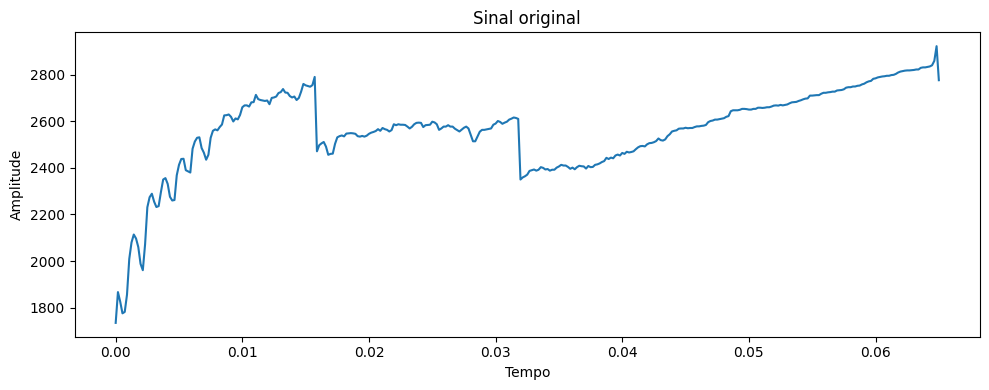

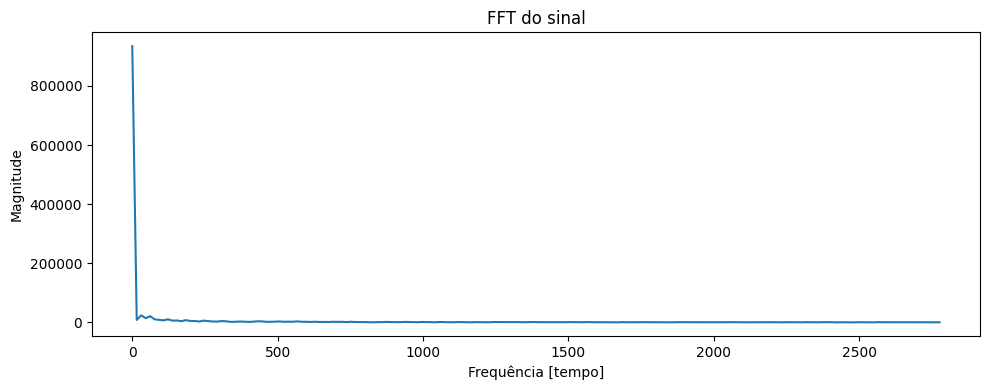

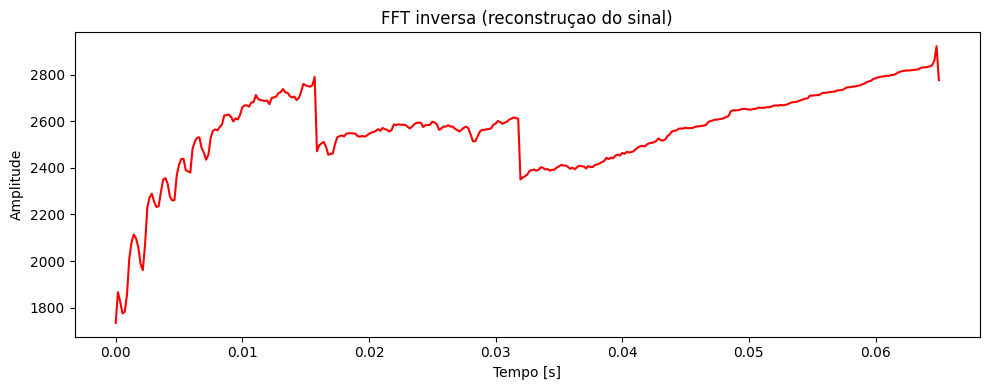

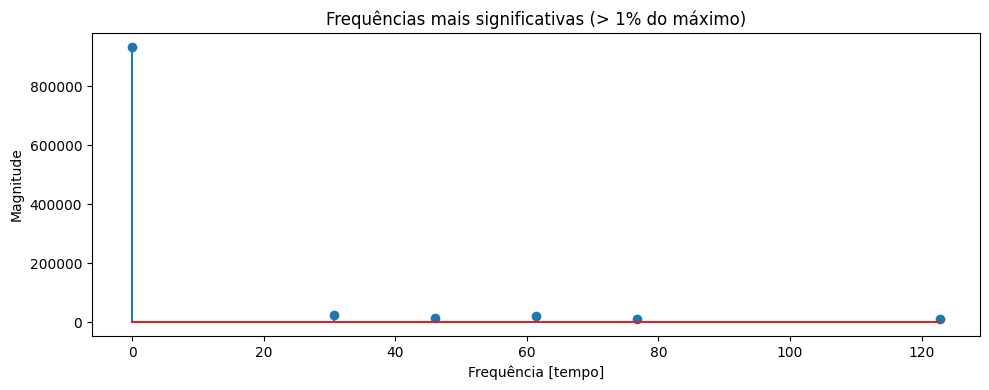

erro de reconstruçao 2.2737367544323206e-12


In [120]:
# aplicando transformada de fourier na serie de frequencia
fourier(df['frequencia'], fs=5600)

Realizaremos os mesmos estudos para as series de preços 

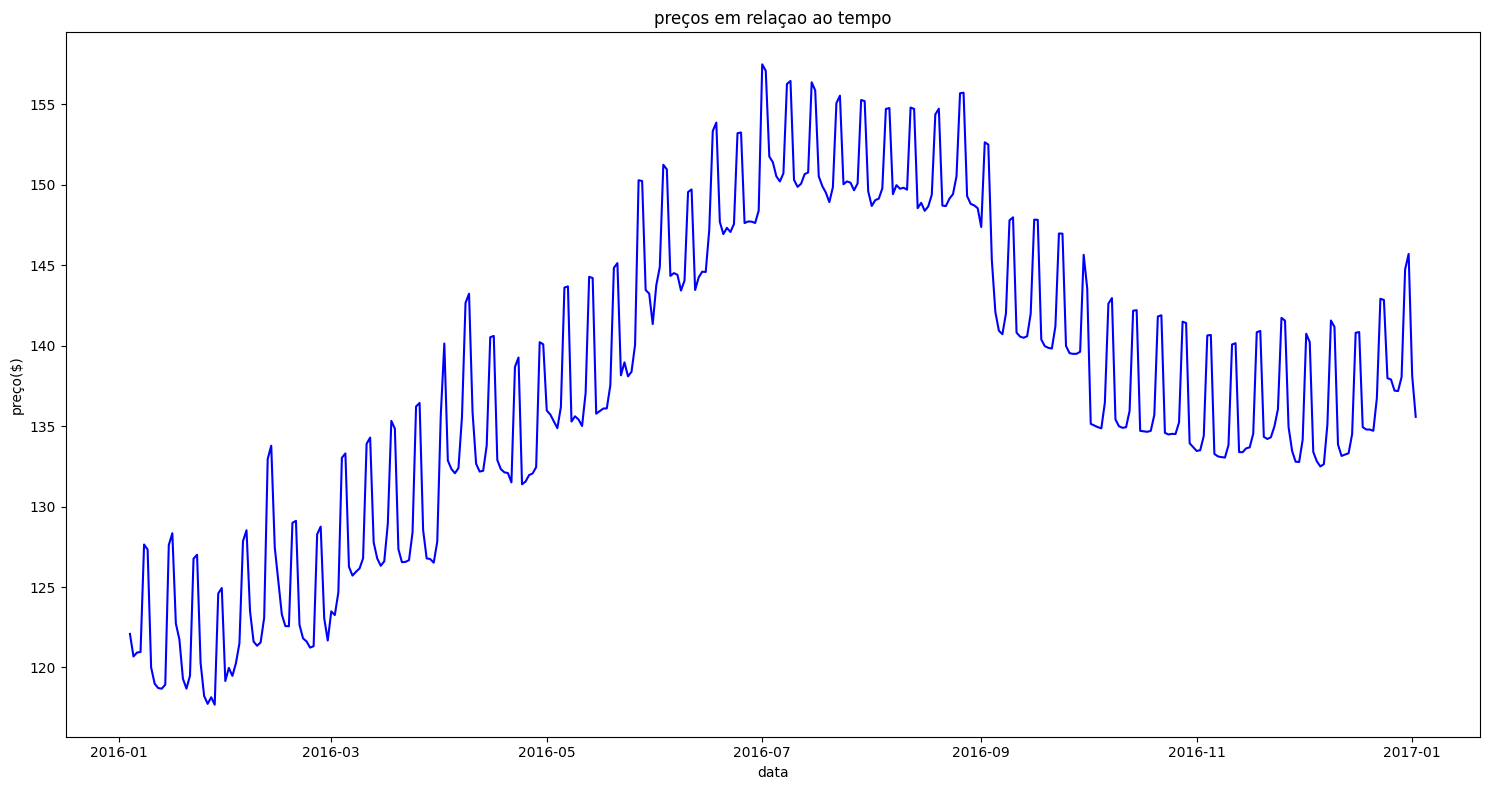

In [116]:
price = df['price']
plt.figure(figsize=(15,8))
plt.title('preços em relaçao ao tempo')
sns.lineplot(data=df, x='date', y='price', color='blue')
plt.xlabel('data')
plt.ylabel('preço($)')
plt.tight_layout()
plt.show()

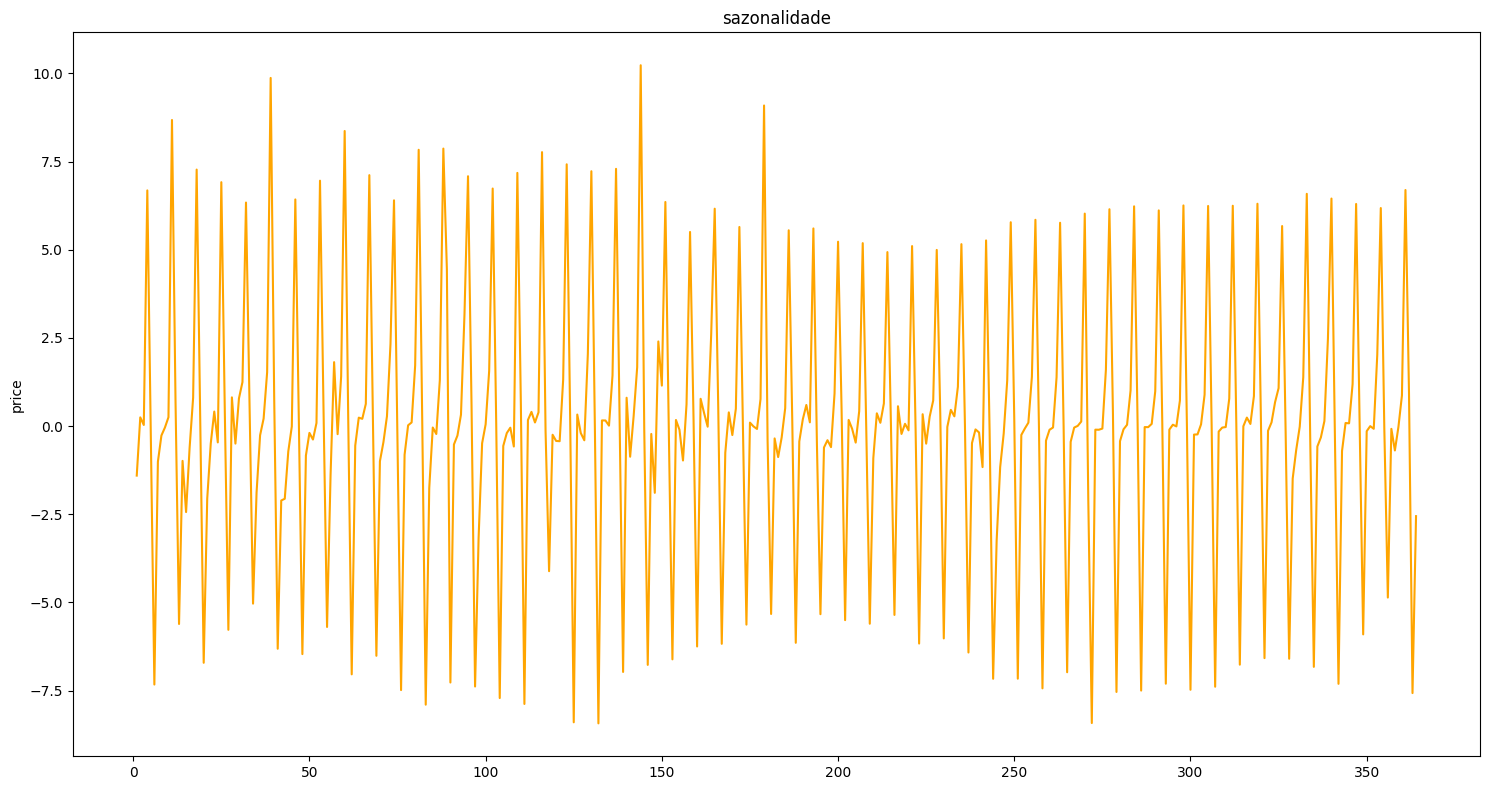

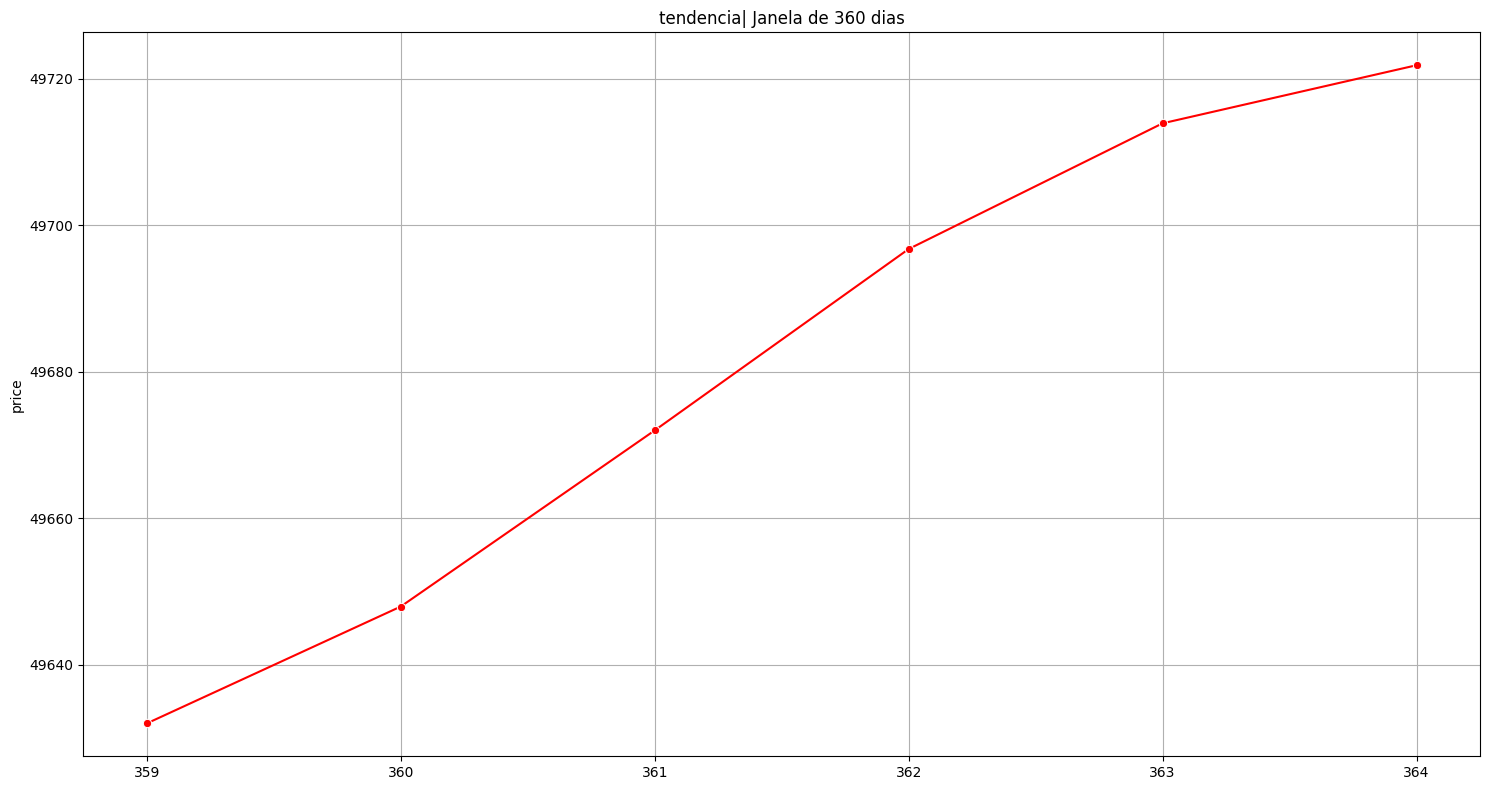

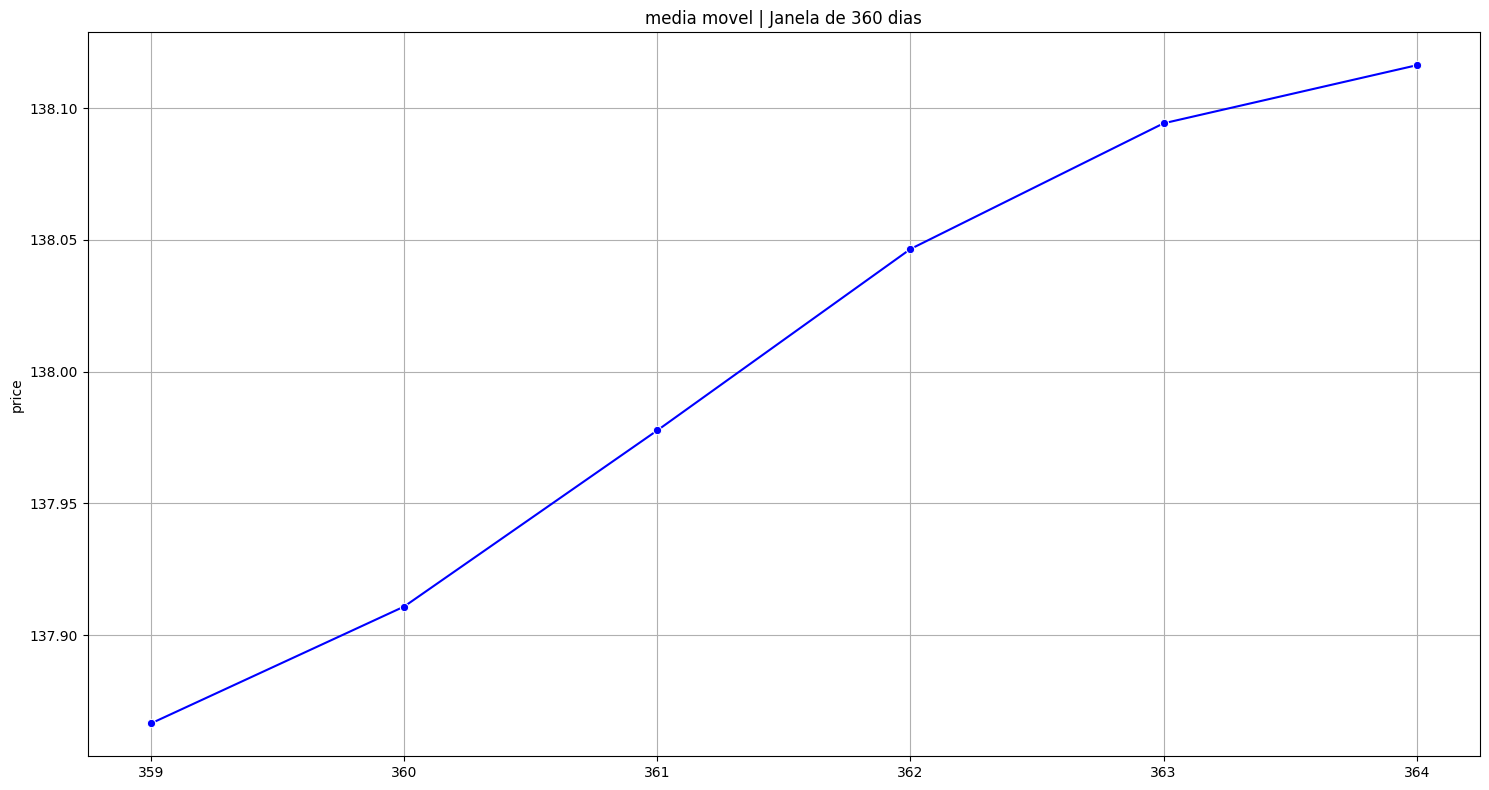

In [117]:
# aplicando decomposiçao da serie de precos 
serie_decomp(price, window=360)

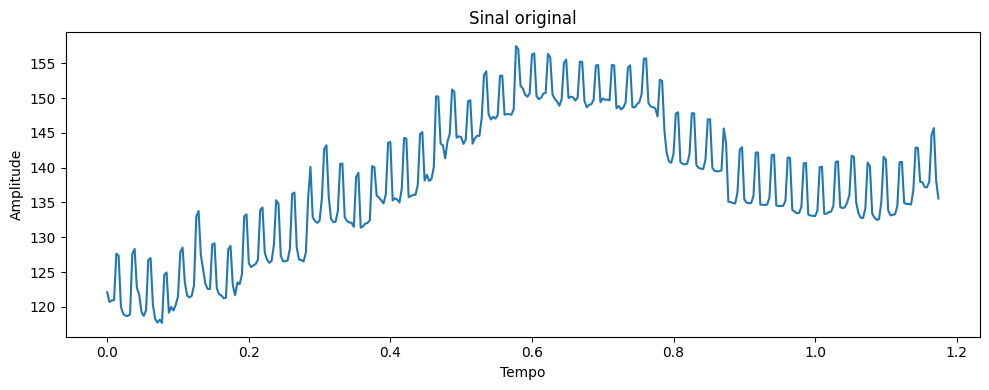

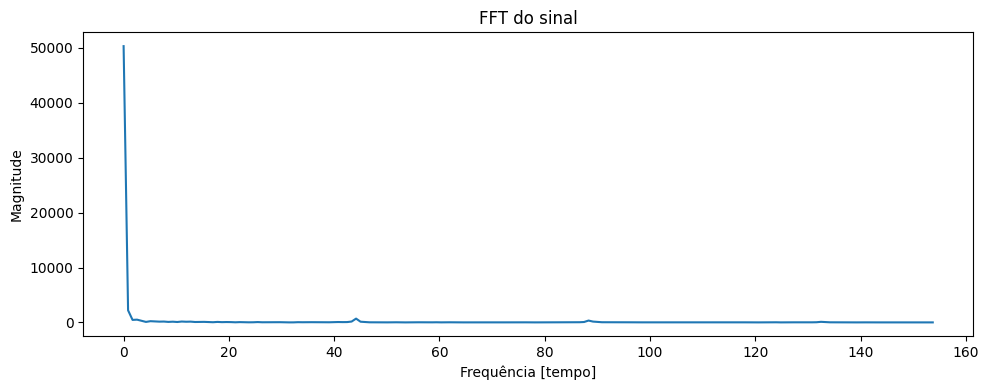

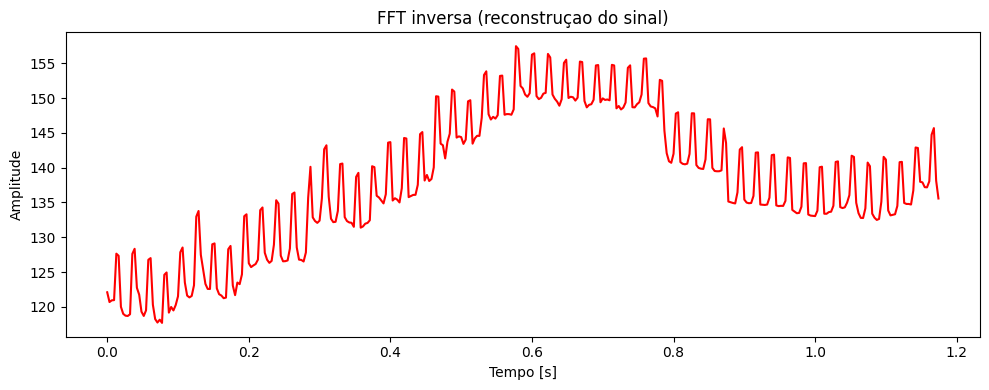

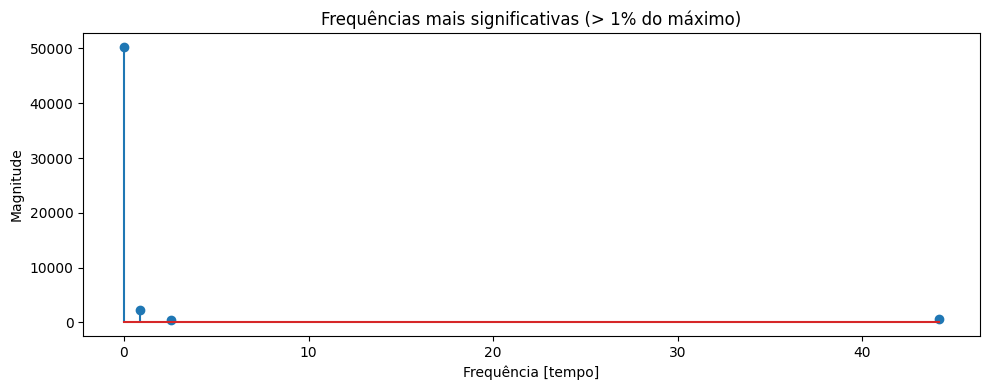

erro de reconstruçao 1.7053025658242404e-13


In [121]:
# aplicando transformada de fourier na serie price 
fourier(price, fs=310)

Conclusoes: 

Serie Frequencia:

- A frequencia de alugueis disponiveis mostram uma queda na temporada de maio até julho. Logo após, o comportamento indica uma crescente, indicando maior demanda de lugares disponiveis para a alta temporada (final de ano)

- a sazonalidade indica que há uma demanda de imoveis disponiveis no inicio do ano, indicando que havera bastante procura em periodos de ferias e pós ano novo

- os graficos de tendencia e media movel indicam uma crescente suave em relaçao a janela de 360 dias

